In [63]:
import numpy as np
def get_track_curvature(waypoints):
  a = np.array(waypoints)
  dx_dt = np.gradient(a[:, 0])
  dy_dt = np.gradient(a[:, 1])
  velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])
  ds_dt = np.sqrt(dx_dt * dx_dt + dy_dt * dy_dt)
  tangent = np.array([1/ds_dt] * 2).transpose() * velocity

  tangent_x = tangent[:, 0]
  tangent_y = tangent[:, 1]

  deriv_tangent_x = np.gradient(tangent_x)
  deriv_tangent_y = np.gradient(tangent_y)

  dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

  length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

  normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt
  d2s_dt2 = np.gradient(ds_dt)
  d2x_dt2 = np.gradient(dx_dt)
  d2y_dt2 = np.gradient(dy_dt)

  curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5
  t_component = np.array([d2s_dt2] * 2).transpose()
  n_component = np.array([curvature * ds_dt * ds_dt] * 2).transpose()

  acceleration = t_component * tangent + n_component * normal
  return (curvature, acceleration, velocity)


In [4]:
import matplotlib.pyplot as plt

In [6]:
waypoints = [
  [2.5, 0.75],
  [3.33, 0.75],
  [4.17, 0.75],
  [5.0, 0.75],
  [5.83, 0.75],
  [6.67, 0.75],
  [7.5, 0.75],
  [8.33, 0.75],
  [9.17, 0.75],
  [9.75, 0.94],
  [10.00, 1.5],
  [10.00, 1.875],
  [9.92, 2.125],
  [9.58, 2.375],
  [9.17, 2.75],
  [8.33, 2.5],
  [7.5, 2.5],
  [7.08, 2.56],
  [6.67, 2.625],
  [5.83, 3.44],
  [5.0, 4.375],
  [4.67, 4.69],
  [4.33, 4.875],
  [4.0, 5.0],
  [3.33, 5.0],
  [2.5, 4.95],
  [2.08, 4.94],
  [1.67, 4.875],
  [1.33, 4.69],
  [0.92, 4.06],
  [1.17, 3.185],
  [1.5, 1.94],
  [1.6, 1.5],
  [1.83, 1.125],
  [2.17, 0.885]]

In [13]:
a = np.array(waypoints)

In [18]:
import pandas as pd

In [21]:
df = pd.DataFrame(np.array(waypoints), columns=['x','y'])

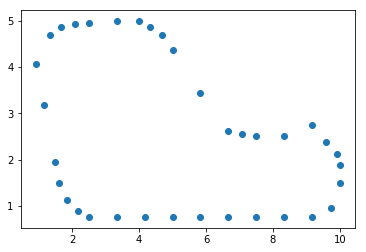

In [24]:
plt.scatter(x=df['x'],y=df['y'])

In [64]:
(curvature, acceleration, velocity) = get_track_curvature(waypoints)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


In [26]:
curvature

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06812722, 0.41645637, 1.06854747,
       0.90403196, 1.81300244, 1.20314789, 0.85973616, 0.6097115 ,
       0.0225446 , 0.26488882, 1.15092582, 0.36167553, 0.05478178,
       0.04032886, 0.65858601, 0.87873128, 0.45308934, 0.07838784,
       0.03645633, 0.33724692, 1.16371818, 1.04666888, 0.63760204,
       0.10797112, 0.02660223, 0.68727138, 0.6889554 , 0.50151794])

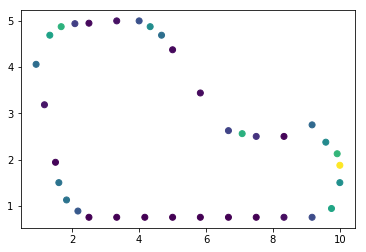

In [50]:
fig = plt.figure()
plt.scatter(x=df['x'],y=df['y'], c=curvature)
plt.show()

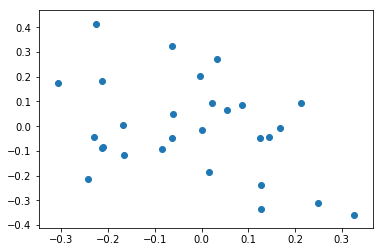

In [55]:
acc = pd.DataFrame(np.array(acceleration), columns=['x','y'])
plt.scatter(x=acc['x'],y=acc['y'])
plt.show()

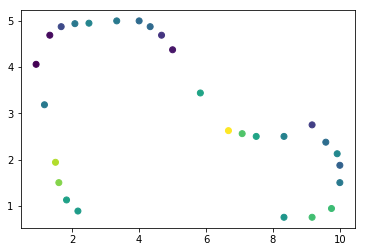

In [60]:
fig = plt.figure()
plt.scatter(x=df['x'],y=df['y'], c=acc['y'])
plt.show()

In [66]:
df['acc_x'] = acc['x']
df['acc_y'] = acc['y']
df

,x,y,acc_x,acc_y
0,2.50,0.750,NaN,NaN
1,3.33,0.750,NaN,NaN
2,4.17,0.750,NaN,NaN
3,5.00,0.750,NaN,NaN
4,5.83,0.750,NaN,NaN
5,6.67,0.750,NaN,NaN
6,7.50,0.750,NaN,NaN
7,8.33,0.750,-5.999301e-02,0.047395
8,9.17,0.750,-2.133752e-01,0.181153
9,9.75,0.940,-3.069656e-01,0.173137


In [79]:
vel = pd.DataFrame(np.array(velocity), columns=['x','y'])
df['vel_x'] = vel['x']
df['vel_y'] = vel['y']
df['v'] = np.sqrt( df['vel_x']**2 + df['vel_y']**2)


,x,y,acc_x,acc_y,vel_x,vel_y,v
0,2.50,0.750,NaN,NaN,0.830,0.0000,0.830000
1,3.33,0.750,NaN,NaN,0.835,0.0000,0.835000
2,4.17,0.750,NaN,NaN,0.835,0.0000,0.835000
3,5.00,0.750,NaN,NaN,0.830,0.0000,0.830000
4,5.83,0.750,NaN,NaN,0.835,0.0000,0.835000
5,6.67,0.750,NaN,NaN,0.835,0.0000,0.835000
6,7.50,0.750,NaN,NaN,0.830,0.0000,0.830000
7,8.33,0.750,-5.999301e-02,0.047395,0.835,0.0000,0.835000
8,9.17,0.750,-2.133752e-01,0.181153,0.710,0.0950,0.716327
9,9.75,0.940,-3.069656e-01,0.173137,0.415,0.3750,0.559330


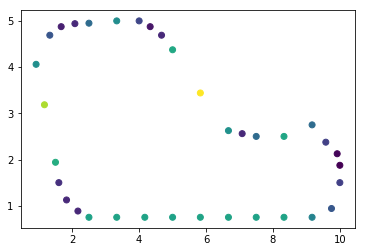

In [80]:
plt.scatter(x=df['x'], y=df['y'], c=df['v']*3)

In [118]:
df['prev_x'] = df['x'].shift(1)
df['prev_y'] = df['y'].shift(1)
df['slope'] = (df['y']-df['prev_y'])/(df['x']-df['prev_x'])
df['slope_abs'] = np.abs(df['slope'])
df['desired_speed'] = 4/df['slope_abs']
df

,x,y,acc_x,acc_y,vel_x,vel_y,v,prev_x,prev_y,slope,slope_abs,desired_speed
0,2.50,0.750,NaN,NaN,0.830,0.0000,0.830000,NaN,NaN,NaN,NaN,NaN
1,3.33,0.750,NaN,NaN,0.835,0.0000,0.835000,2.50,0.750,0.000000,0.000000,inf
2,4.17,0.750,NaN,NaN,0.835,0.0000,0.835000,3.33,0.750,0.000000,0.000000,inf
3,5.00,0.750,NaN,NaN,0.830,0.0000,0.830000,4.17,0.750,0.000000,0.000000,inf
4,5.83,0.750,NaN,NaN,0.835,0.0000,0.835000,5.00,0.750,0.000000,0.000000,inf
5,6.67,0.750,NaN,NaN,0.835,0.0000,0.835000,5.83,0.750,0.000000,0.000000,inf
6,7.50,0.750,NaN,NaN,0.830,0.0000,0.830000,6.67,0.750,0.000000,0.000000,inf
7,8.33,0.750,-5.999301e-02,0.047395,0.835,0.0000,0.835000,7.50,0.750,0.000000,0.000000,inf
8,9.17,0.750,-2.133752e-01,0.181153,0.710,0.0950,0.716327,8.33,0.750,0.000000,0.000000,inf
9,9.75,0.940,-3.069656e-01,0.173137,0.415,0.3750,0.559330,9.17,0.750,0.327586,0.327586,12.210526


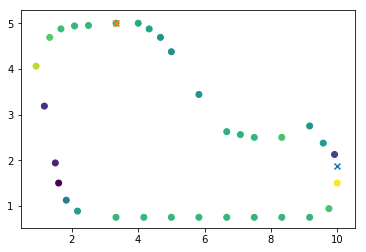

In [117]:
plt.scatter(x=df['x'],y=df['y'], c=df['slope'])
plt.scatter(x=df['x'][11], y=df['y'][11], marker='x')
plt.scatter(x=df['x'][24], y=df['y'][24], marker='x')

In [116]:
import math
abs(-2)

2